# Exercise 7

# Part 1 - DT

## Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [6]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [7]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [8]:
bikes.groupby('workingday').total.count()

workingday
0    3474
1    7412
Name: total, dtype: int64

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Las agrupaciones nos muestran que en promedio se renta un mayor número de bicicletas los dias laborales, además, la renta se concentra entre las 7am y 10pm, siendo las 5pm y 6pm las horas de mayor afluencia

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

<AxesSubplot:xlabel='hour'>

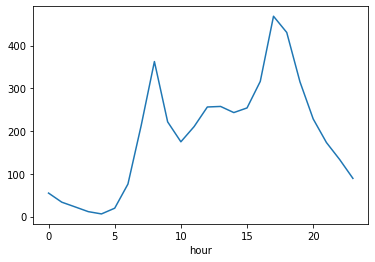

In [10]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

<AxesSubplot:xlabel='hour'>

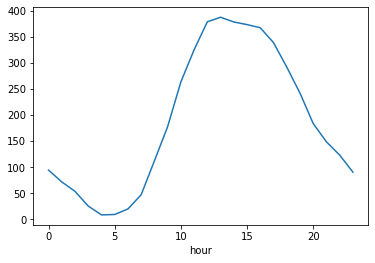

In [11]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

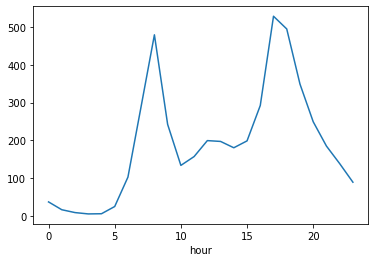

In [12]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

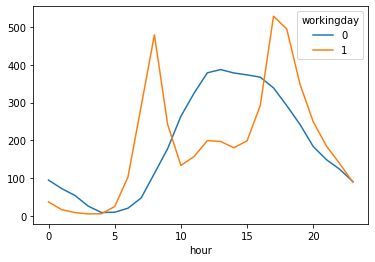

In [13]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

El comportamiento a total mantiene la tendencia de los dias laborales, dado que el 68% de los registros tienen esta caracteristica.

Ademas, al observar el comportamiento de la renta separando los días laborales de los no laborales, se puede notar que la dinamica de renta es diferente en el transcurso de las horas del dia, donde los picos de renta en los dias laborales tienden a situarse al iniciar y finalizar la jornada laboral, mientras que para los días no laborales estos picos se ubican a partir de las 11am y hasta las 5pm

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [14]:
bikes['workingday'] = bikes['workingday'].astype('category')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  int64   
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  int64   
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  total       10886 non-null  int64   
 11  hour        10886 non-null  int64   
dtypes: category(1), float64(3), int64(8)
memory usage: 1.0 MB


In [15]:
regresion_lineal=LinearRegression()
regresion_lineal.fit(bikes[["hour","workingday"]],bikes[["total"]])
print('coeficientes = ' + str(regresion_lineal.coef_) + ', intercepto = ' + str(regresion_lineal.intercept_))

coeficientes = [[10.49206282  4.07248627]], intercepto = [67.70595026]


En este caso el coeficiente para la variable hora es 10,5 lo que nos señala que a medida que transcurren las horas en el día la renta de bicicletas aumenta en 10,5 unidades (suponiendo todo lo demás costante).

Por su parte, el coeficiente de la variable workingday es 4,1, es decir, los días laborales se incrementa la renta en 4,1 unidades.

La limitación que tiene la regresión lineal en este punto radica en que no es capaz de explicar los picos que se presentan en los horarios tanto para los días laborales como los no laborales.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [16]:
bikes.total.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64

Se genera una variable binaria que se considera 1 si supera el promedio de la variable total y 0 eoc

In [17]:
y = (bikes.total > 191).astype(int)

In [18]:
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [19]:
j = 11
print(bikes.columns[j])

hour


In [20]:
# Split the variable in num_ctp points
splits = np.percentile(bikes.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())

In [21]:
# Only unique values for filter binary and few unique values features
splits = np.unique(splits)

In [22]:
splits

array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [23]:
k = 5

In [24]:
filter_l = bikes.iloc[:, j] < splits[k]

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [25]:
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [26]:
gini_l = gini(y_l)
gini_l

0.34912564382808653

In [27]:
gini_r = gini(y_r)
gini_r

0.48931295099346805

In [28]:
def gini_impurity(X_col, y, split):
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [29]:
gini_impurity(bikes.iloc[:, j], y, splits[k])

0.06046599542068887

In [30]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [31]:
X=bikes[["hour"]]
j, split, gain = best_split(X, y, 5)
j, split, gain

(0, 8.0, 0.10845540825531091)

In [32]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

Finalmente se genera un arbol con una profundidad de 3 para tener el numero de nodos deseados

In [33]:
tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)

{'y_pred': 0,
 'y_prob': 0.400165319617928,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 0.10845540825531091,
 'sl': {'y_pred': 0,
  'y_prob': 0.06868743047830923,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 0.05819371744163647,
  'sl': {'y_pred': 0,
   'y_prob': 0.0038204393505253103,
   'level': 2,
   'split': -1,
   'n_samples': 3139,
   'gain': 4.785361675416124e-05},
  'sr': {'y_pred': 1,
   'y_prob': 0.5164113785557987,
   'level': 2,
   'split': -1,
   'n_samples': 455,
   'gain': 0}},
 'sr': {'y_pred': 1,
  'y_prob': 0.5636139292569236,
  'level': 1,
  'split': [0, 22.0],
  'n_samples': 7292,
  'gain': 0.05722720488024302,
  'sl': {'y_pred': 1,
   'y_prob': 0.627546223754309,
   'level': 2,
   'split': [0, 16.0],
   'n_samples': 6380,
   'gain': 0.009439550076935421,
   'sl': {'y_pred': 1,
    'y_prob': 0.568019747668678,
    'level': 3,
    'split': -1,
    'n_samples': 3644,
    'gain': 0.004410136160538924},
   'sr': {'y_pred': 1,
    

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [34]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
for depth in max_depth_range:
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, bikes[["hour","workingday"]], y, cv=10).mean())

Text(0, 0.5, 'Accuracy')

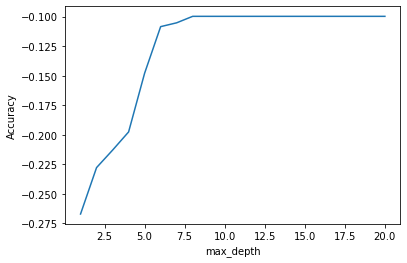

In [35]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [36]:
# train/test split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(bikes[["hour","workingday"]], y, random_state=123)

In [37]:
model1 = DecisionTreeClassifier(max_depth=10, random_state=1)
model1.fit(X_train1, y_train1)                  
y_model = model1.predict(X_test1)
accuracy_score(y_test1, y_model)

0.8115356355620867

Para una profundida de 10 niveles, se obtuvo una precision de 0.811, es un buen resultado pero se deberia poder mejorar implementando baggin, debido a que en este proceso se reduce la varianza mejorando la predicción del modelo.

# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [38]:
df = pd.read_csv('mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [39]:
df.shape

(6000, 61)

In [40]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [41]:
y.mean()

0.5

In [42]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [43]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

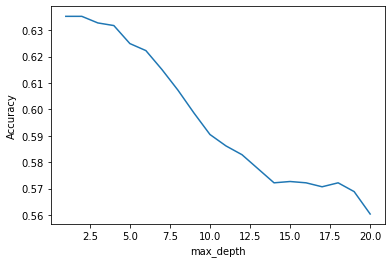

In [44]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [45]:
from sklearn.metrics import f1_score
model = DecisionTreeClassifier(max_depth=4, random_state=1)
model.fit(X_train, y_train)                  
y_model = model.predict(X_test)
accuracy_score(y_test, y_model), f1_score(y_test, y_model)


(0.6513333333333333, 0.6345213137665969)

# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [46]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV

Create 100  Decision Trees where max_depth=None

In [47]:
n_estimators = 100
# set a seed for reproducibility
np.random.seed(123)

n_samples1 = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples1 = [np.random.choice(a=n_samples1, size=n_samples1, replace=True) for _ in range(n_estimators)]

In [48]:
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples1[i]], y_train.iloc[samples1[i]])

Create 100 Decision Trees where max_depth=2

In [49]:
# set a seed for reproducibility
np.random.seed(1234)

n_samples2 = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples2 = [np.random.choice(a=n_samples2, size=n_samples2, replace=True) for _ in range(n_estimators)]

In [50]:
np.random.seed(1234) 
seeds = np.random.randint(1, 10000, size=n_estimators)

#trees2 = {}
for i in range(n_estimators):
    trees[100+i] = DecisionTreeClassifier(max_features="sqrt", max_depth=2, random_state=seeds[i])
    trees[100+i].fit(X_train.iloc[samples2[i]], y_train.iloc[samples2[i]])

Create 100 Logistic Regressions

In [51]:
# set a seed for reproducibility
np.random.seed(12345)

n_samples3 = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples3 = [np.random.choice(a=n_samples3, size=n_samples3, replace=True) for _ in range(n_estimators)]

In [52]:
np.random.seed(12345) 
seeds = np.random.randint(1, 10000, size=n_estimators)

#trees3 = {}
for i in range(n_estimators):
    trees[200+i] = LogisticRegression()
    trees[200+i].fit(X_train.iloc[samples3[i]], y_train.iloc[samples3[i]])

C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\andrgu02\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [53]:
n_estimators2=300
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators2)))
#y_pred_df_prob = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators2)))
for i in range(n_estimators2):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)
    #y_pred_df_prob.iloc[:, i] = trees[i].predict_proba(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,0,0,1,0,1,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
2520,1,0,1,1,1,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3721,0,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [54]:
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators2 / 2))

metrics.f1_score(y_pred, y_test),metrics.accuracy_score(y_pred, y_test)

(0.6282225237449119, 0.6346666666666667)

# Exercise 7.9

Estimate the probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [55]:
tresh = np.arange(0.1,1,0.01)
F1=[]
for param in tresh:
    try:
        y_pred = (y_pred_df.sum(axis=1)/300 >= param ).astype(np.int64)
        F1.append(metrics.f1_score(y_pred, y_test))
    except:
        continue

In [56]:
tresh[np.argmax(F1)] ,F1[np.argmax(F1)]

(0.18999999999999995, 0.7098078867542973)

Se encuentra que para un valor de 0.19 tenemos el mejor valor de la métrica f1 0.7098.

# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [57]:
samples=[]
samples.extend(samples1)
samples.extend(samples2)
samples.extend(samples3)


In [58]:
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples1)) - set(sample)))

In [59]:
errors = np.zeros(n_estimators2)

for i in range(n_estimators2):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

In [60]:
alpha = (1 - errors) / (1 - errors).sum()
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)


y_predw = (weighted_sum_1 >= 0.5).astype(np.int64)

metrics.f1_score(y_predw, y_test), metrics.accuracy_score(y_predw, y_test)

(0.6223728813559323, 0.6286666666666667)

# Exercise 7.11

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [61]:
tresh2 = np.arange(0.1,1,0.01)
F12=[]
for param in tresh2:
    try:
        y_predw2 = (weighted_sum_1 >= param).astype(np.int64)
        F12.append(metrics.f1_score(y_predw2, y_test))
    except:
        continue

In [62]:
tresh2[np.argmax(F12)] ,F12[np.argmax(F12)]

(0.16999999999999998, 0.7089737233515122)

Se encuentra que para un valor de 0.17 tenemos el mejor valor de la métrica f1 0.7089, que es muy similar a la obtenida en el punto 7.9.

# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [63]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators2)))

for i in range(n_estimators2):
    X_train_2[i] = trees[i].predict(X_train)
    
X_train_2.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2420,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
1225,1,1,1,1,1,1,0,1,1,0,...,1,0,1,1,1,0,0,1,0,1
324,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5863,1,1,1,1,1,1,0,1,1,1,...,1,1,0,1,1,1,1,1,0,0
86,1,1,0,1,1,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0


In [64]:
lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_train_2, y_train)
lr.coef_

array([[0.03430456, 0.03493504, 0.03336845, 0.03374844, 0.03409068,
        0.03416635, 0.0341217 , 0.03333679, 0.03320656, 0.03556014,
        0.03521899, 0.03369089, 0.03420747, 0.03454034, 0.03449106,
        0.03542003, 0.03295278, 0.03398236, 0.03316767, 0.0338545 ,
        0.03362275, 0.03357876, 0.03424457, 0.03345995, 0.03343603,
        0.03381268, 0.03280144, 0.03349459, 0.03396973, 0.03448885,
        0.03362545, 0.03427982, 0.03467793, 0.03321711, 0.03466909,
        0.03395936, 0.0333019 , 0.03476359, 0.03265532, 0.0330661 ,
        0.03336084, 0.03364553, 0.03398438, 0.03464449, 0.03429671,
        0.03419721, 0.0343157 , 0.03385776, 0.03376385, 0.0348916 ,
        0.03387107, 0.03350821, 0.03302763, 0.03454948, 0.03451393,
        0.034006  , 0.03391578, 0.03453652, 0.03369191, 0.03357677,
        0.03447776, 0.03356339, 0.03296952, 0.03383774, 0.03435724,
        0.03427072, 0.03441863, 0.03439984, 0.03418387, 0.0330657 ,
        0.03355324, 0.03407991, 0.03385115, 0.03

In [65]:
y_pred = lr.predict(y_pred_df)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6613651424784625, 0.6593333333333333)

In [66]:
y_pred_prob = lr.predict_proba(y_pred_df)[:,0]
y_pred_prob

array([0.27460512, 0.34803224, 0.35340559, ..., 0.40147775, 0.67264492,
       0.71100263])

In [67]:
tresh3 = np.arange(0.1,1,0.01)
F13=[]
for param in tresh2:
    try:
        y_predlr = (y_pred_prob >= param).astype(np.int64)
        F13.append(metrics.f1_score(y_predlr, y_test))
    except:
        continue

In [68]:
tresh3[np.argmax(F13)] ,F13[np.argmax(F13)]

(0.1, 0.6702127659574468)

Se encuentra que para un valor de 0.1 tenemos el mejor valor de la métrica f1 0.6702, que no supera a la obtenida en el punto 7.9.